In [86]:
from scipy import stats

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import seaborn as sns

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import os

import graphviz
from graphviz import Graph

import env
import acquire_telco
import prepare_telco
import helper

import warnings
warnings.filterwarnings("ignore")

![](telco_churn_pic.png)

### PLAN

In [87]:
# project plan and goals in readme

In [88]:
# work through pipeline

In [89]:
# data dictionary 

In [90]:
# Clearly stating hypotheses(and add the testing of these to your task list)

#### Hypothesis testing
α = .05
#### hypothesis 1
$H_O$ - there is no affect on weather or not a customer has autopayment and churns

$H_A$ - There is an affect on churn, depending on weather or not a customer has autopay
#### hypothesis 2
$H_O$ - The number of additional services will not have an affect on churn. (refering to addons column)

$H_A$ - The number of additional services will have an affect on churn. (referring to addons column)

## Acquire

- created a python function that will automatically call a sql query that joins all of the tables in telco churn
- added my get connection so that i can connect sql to python to create my pandas database
- set the function to cache my telco data to a csv so i dont need to connect to sql every time i acquire the telco database

In [91]:
df = acquire_telco.get_telco_data()

In [92]:
def num_distributions(df):
    '''
    property of Faith Kane
    This functions takes in a dataframe and displays
    the distribution of each numeric column.
    '''
    for col in df.columns:
        if df[col].dtype != 'object' or df[col] == df["total_charges"]:
            plt.hist(df[col])
            plt.title(f'Distribution of {col}')
            plt.show()

In [93]:
df.head()

,Unnamed: 0,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id.1,contract_type,internet_service_type_id.1,internet_service_type,payment_type_id.1,payment_type
0,0,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,...,2,90.45,5957.9,No,3,Two year,1,DSL,2,Mailed check
1,1,0017-DINOC,Male,0,No,No,54,No,No phone service,1,...,4,45.20,2460.55,No,3,Two year,1,DSL,4,Credit card (automatic)
2,2,0019-GFNTW,Female,0,No,No,56,No,No phone service,1,...,3,45.05,2560.1,No,3,Two year,1,DSL,3,Bank transfer (automatic)
3,3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,1,...,4,39.40,825.4,No,3,Two year,1,DSL,4,Credit card (automatic)
4,4,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,1,...,3,85.15,6316.2,No,3,Two year,1,DSL,3,Bank transfer (automatic)


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  7043 non-null   int64  
 1   customer_id                 7043 non-null   object 
 2   gender                      7043 non-null   object 
 3   senior_citizen              7043 non-null   int64  
 4   partner                     7043 non-null   object 
 5   dependents                  7043 non-null   object 
 6   tenure                      7043 non-null   int64  
 7   phone_service               7043 non-null   object 
 8   multiple_lines              7043 non-null   object 
 9   internet_service_type_id    7043 non-null   int64  
 10  online_security             7043 non-null   object 
 11  online_backup               7043 non-null   object 
 12  device_protection           7043 non-null   object 
 13  tech_support                7043 

In [95]:
df.describe()

,Unnamed: 0,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,contract_type_id.1,internet_service_type_id.1,payment_type_id.1
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.162147,32.371149,1.872923,1.690473,2.315633,64.761692,1.690473,1.872923,2.315633
std,2033.283305,0.368612,24.559481,0.737796,0.833755,1.148907,30.090047,0.833755,0.737796,1.148907
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,18.250000,1.000000,1.000000,1.000000
25%,1760.500000,0.000000,9.000000,1.000000,1.000000,1.000000,35.500000,1.000000,1.000000,1.000000
50%,3521.000000,0.000000,29.000000,2.000000,1.000000,2.000000,70.350000,1.000000,2.000000,2.000000
75%,5281.500000,0.000000,55.000000,2.000000,2.000000,3.000000,89.850000,2.000000,2.000000,3.000000
max,7042.000000,1.000000,72.000000,3.000000,3.000000,4.000000,118.750000,3.000000,3.000000,4.000000


In [97]:
df.value_counts()

Unnamed: 0  customer_id  gender  senior_citizen  partner  dependents  tenure  phone_service  multiple_lines    internet_service_type_id  online_security      online_backup        device_protection    tech_support         streaming_tv         streaming_movies     contract_type_id  paperless_billing  payment_type_id  monthly_charges  total_charges  churn  contract_type_id.1  contract_type   internet_service_type_id.1  internet_service_type  payment_type_id.1  payment_type             
0           0016-QLJIS   Female  0               Yes      Yes         65      Yes            Yes               1                         Yes                  Yes                  Yes                  Yes                  Yes                  Yes                  3                 Yes                2                90.45            5957.9         No     3                   Two year        1                           DSL                    2                  Mailed check                 1
4691        5956-YH

In [98]:
df.isnull().sum()

Unnamed: 0                    0
customer_id                   0
gender                        0
senior_citizen                0
partner                       0
dependents                    0
tenure                        0
phone_service                 0
multiple_lines                0
internet_service_type_id      0
online_security               0
online_backup                 0
device_protection             0
tech_support                  0
streaming_tv                  0
streaming_movies              0
contract_type_id              0
paperless_billing             0
payment_type_id               0
monthly_charges               0
total_charges                 0
churn                         0
contract_type_id.1            0
contract_type                 0
internet_service_type_id.1    0
internet_service_type         0
payment_type_id.1             0
payment_type                  0
dtype: int64

In [99]:
df.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [101]:
# I wanted all of my values to be numeric so that I could so I changed the values that were "yes", "no", or
# "no {X} service" to their respective boolean values.
# I also changed the data type for total charges, and created an auto_pay column and a column that for add_ons that
# summed the values of the six optional additional services.
# after that i dropped any columns that i had made dummy variables for and  the id's that i no longer needed

In [102]:
def clean_telco(df):

    df.total_charges.replace(to_replace = {" ":"0"}, inplace = True)
    df.total_charges = df.total_charges.astype("float")
    df["auto_pay"] = df.payment_type.str.contains("auto")
    df["auto_pay"] = df.auto_pay.replace(to_replace = [True,False],value = [1,0])
    dummy_df = pd.get_dummies(df[['gender', 'payment_type',"internet_service_type","contract_type"]])
    dummy_df.columns = [col.lower().replace(" ","_") for col in dummy_df]
    
    df["partner"] = df.partner.replace(to_replace = ["Yes","No"],value = [1,0])
    df["dependents"] = df.dependents.replace(to_replace = ["Yes","No"],value = [1,0])
    df["churn"] = df.churn.replace(to_replace = ["Yes","No"],value = [1,0])
    df["multiple_lines"] = df.paperless_billing.replace(to_replace = ["Yes","No","No phone service"],value = [1,0,0])
    df["paperless_billing"] = df.paperless_billing.replace(to_replace = ["Yes","No","No internet service"],value = [1,0,0])
    df["tech_support"] = df.tech_support.replace(to_replace = ["Yes","No","No internet service"],value = [1,0,0])
    df["device_protection"] = df.device_protection.replace(to_replace = ["Yes","No","No internet service"],value = [1,0,0])
    df["online_backup"] = df.online_backup.replace(to_replace = ["Yes","No","No internet service"],value = [1,0,0])
    df["online_security"] = df.online_security.replace(to_replace = ["Yes","No","No internet service"],value = [1,0,0])
    df["streaming_tv"] = df.streaming_tv.replace(to_replace = ["Yes","No","No internet service"],value = [1,0,0])
    df["streaming_movies"] = df.streaming_movies.replace(to_replace = ["Yes","No","No internet service"],value = [1,0,0])
    df["phone_service"] = df.phone_service.replace(to_replace = ["Yes","No","No internet service"],value = [1,0,0])
    df["multiple_lines"] = df.multiple_lines.replace(to_replace = ["Yes","No","No phone service"],value = [1,0,0])
    
    df["add_ons"] =  df.online_security + df.online_backup + df.device_protection + df.tech_support + df.streaming_tv + df.streaming_movies
    
    df.drop(columns = ["customer_id",
                       "gender",
                       "payment_type",
                       "internet_service_type",
                       "contract_type",
                   'internet_service_type_id',
                   "contract_type_id",
                   "payment_type_id",
                  "contract_type_id.1",
                   "internet_service_type_id.1",
                   "payment_type_id.1",
                   "Unnamed: 0"],inplace = True)
    return pd.concat([df, dummy_df], axis=1)

In [103]:
clean_telco(df)

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,...,payment_type_bank_transfer_(automatic),payment_type_credit_card_(automatic),payment_type_electronic_check,payment_type_mailed_check,internet_service_type_dsl,internet_service_type_fiber_optic,internet_service_type_none,contract_type_month-to-month,contract_type_one_year,contract_type_two_year
0,0,1,1,65,1,1,1,1,1,1,...,0,0,0,1,1,0,0,0,0,1
1,0,0,0,54,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,56,0,0,1,1,1,1,...,1,0,0,0,1,0,0,0,0,1
3,0,1,1,20,0,1,1,0,1,1,...,0,1,0,0,1,0,0,0,0,1
4,0,1,0,72,1,1,0,1,1,1,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
7039,0,0,0,19,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
7040,0,0,0,6,1,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
7041,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0


In [104]:
prepare_telco.remove_unwanted_values(df)

In [105]:
df.shape

(7032, 18)

In [106]:
# ~ 73.5% yes
# ~ 26.5% no

In [107]:
def num_distributions(df):
    '''
    property of Faith Kane
    This functions takes in a dataframe and displays
    the distribution of each numeric column.
    '''
    for col in df.columns:
        if df[col].dtype != 'object':
            plt.hist(df[col])
            plt.title(f'Distribution of {col}')
            plt.show()

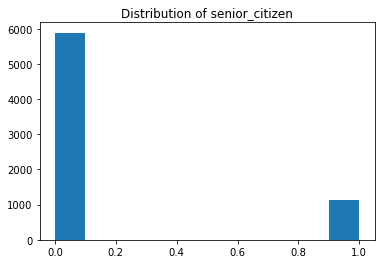

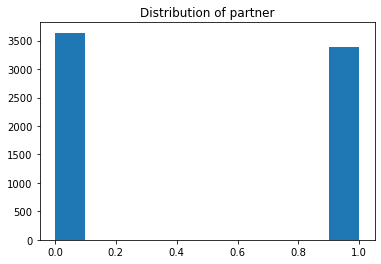

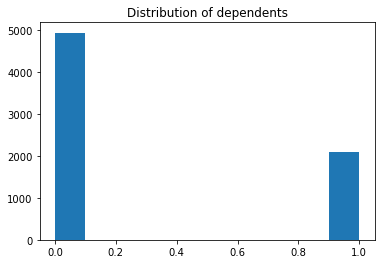

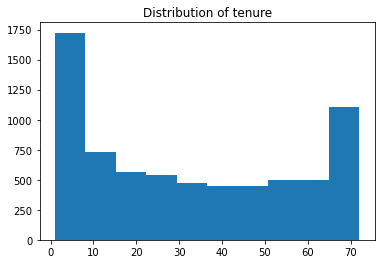

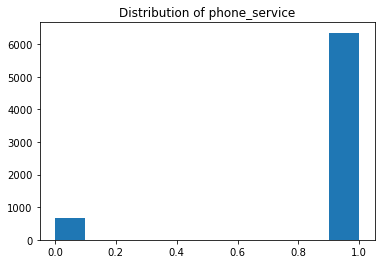

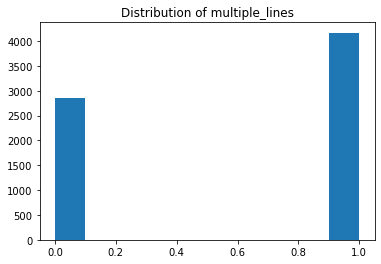

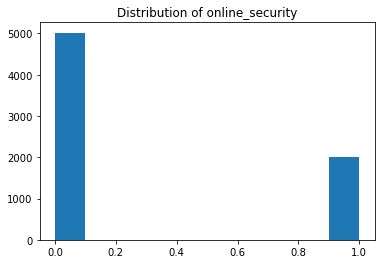

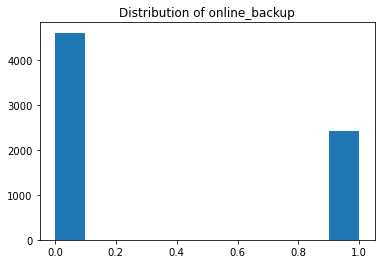

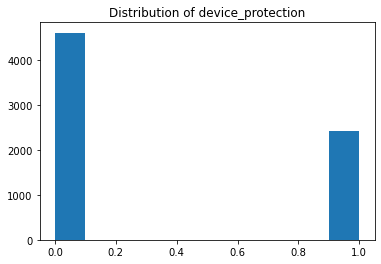

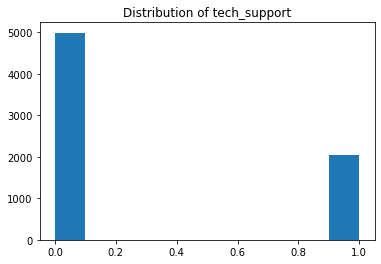

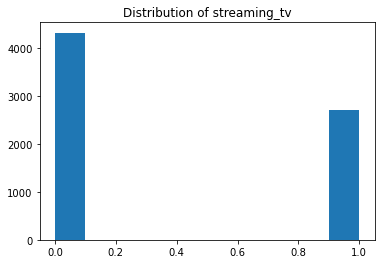

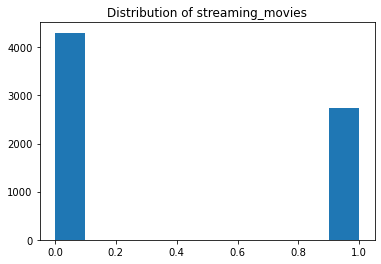

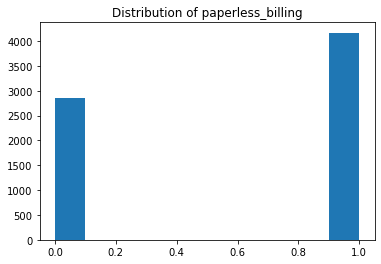

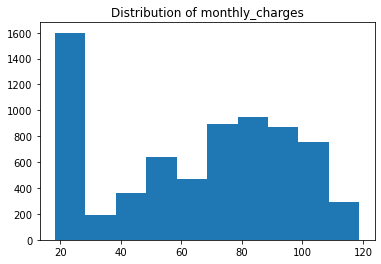

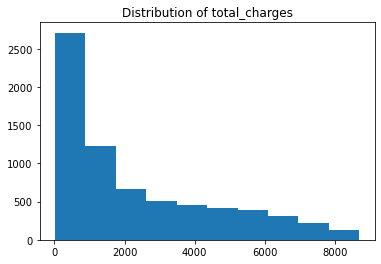

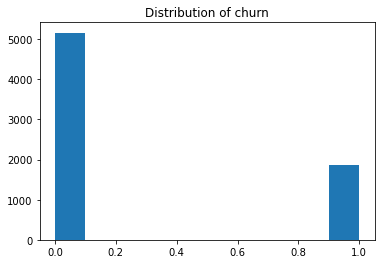

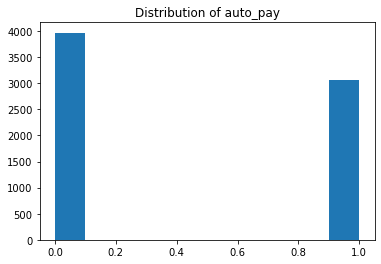

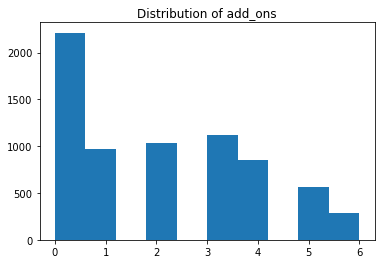

In [108]:
prepare_telco.num_distributions(df)

### Choosing what to plot
##### scatterplot
- Tenure, total_charges, monthly charges

## Prepare

In [109]:
def splitting_target_var(train,validate,test):
    X_train = train.drop(columns=['churn'])
    y_train = train.churn

    X_validate = validate.drop(columns=['churn'])
    y_validate = validate.churn

    X_test = test.drop(columns=['churn'])
    y_test = test.churn
    return (X_train,y_train,X_validate,y_validate,X_test,y_test)

In [110]:
train,validate,test = prepare_telco.train_validate_test_split(df,target = "churn",seed = 174)

In [111]:
X_train,y_train,X_validate,y_validate,X_test,y_test = splitting_target_var(train,validate,test)

In [112]:
x = train.add_ons
y = train.churn
r, p = stats.pearsonr(x, y)
print(f'r = {r:.5f}')
print(f'p = {p:.10f}')

r = -0.08736
p = 0.0000000401


In [113]:
x = train.auto_pay
y = train.churn
r, p = stats.pearsonr(x, y)
print(f'r = {r:.5f}')
print(f'p = {p:.10f}')

r = -0.20713
p = 0.0000000000


## Model and Evaluate

In [114]:
model = DummyClassifier(strategy='most_frequent')

In [115]:
model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [116]:
accuracy = round(model.score(X_train, y_train), 2)
print(f'Training accuracy: {accuracy}')

Training accuracy: 0.73


In [117]:
clf = DecisionTreeClassifier(max_depth=5, random_state=174)

In [118]:
clf = clf.fit(X_train, y_train)

In [119]:
#dot_data = export_graphviz(decision_tree = clf,feature_names= X_train.columns)
#graph = graphviz.Source(dot_data) 

#graph.render('titanic_decision_tree', view=True)

In [120]:
y_pred = clf.predict(X_train)

In [121]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.80


In [122]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on training set: 0.80


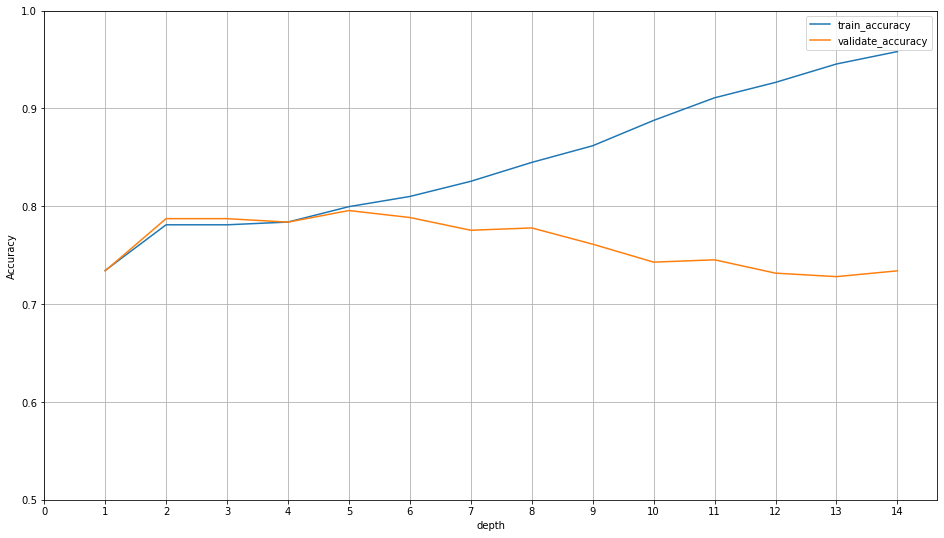

In [39]:
metrics = []

# loop through different values of k
for depth in range(1, 15):
            
    # define the thing
    clf = DecisionTreeClassifier(max_depth = depth)
    
    # fit the thing (remmeber only fit on training data)
    clf.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = clf.score(X_train, y_train)
    validate_accuracy = clf.score(X_validate, y_validate)
    
    output = {
        "depth": depth,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)

# plot the data
results.set_index('depth').plot(figsize = (16,9))
plt.ylim(0.50, 1)
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,15,1))
plt.grid()

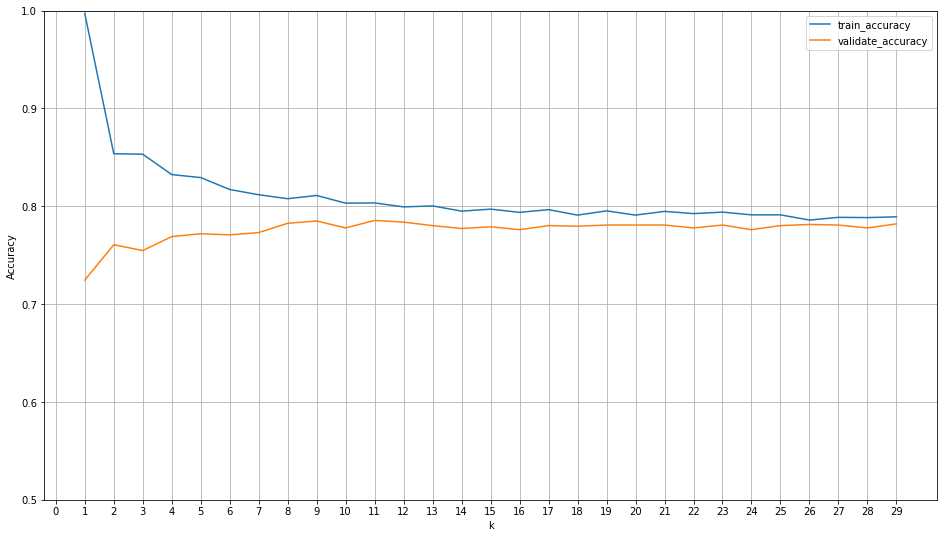

In [41]:
metrics = []

# loop through different values of k
for k in range(1, 30,1):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remmeber only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)

# plot the data
results.set_index('k').plot(figsize = (16,9))
plt.ylim(0.50, 1)
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,30,1))
plt.grid()

In [125]:
rf_1 = RandomForestClassifier(bootstrap = True,
                           class_weight = None,
                           criterion = "gini",
                           min_samples_leaf = 15,
                           n_estimators = 200,
                           max_depth = 3,
                           random_state = 123)

In [126]:
rf_1.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=15, n_estimators=200,
                       random_state=123)

In [127]:
accuracy = round(rf_1.score(X_train, y_train), 2)
print(f'Model accuracy: {accuracy}')

Model accuracy: 0.77


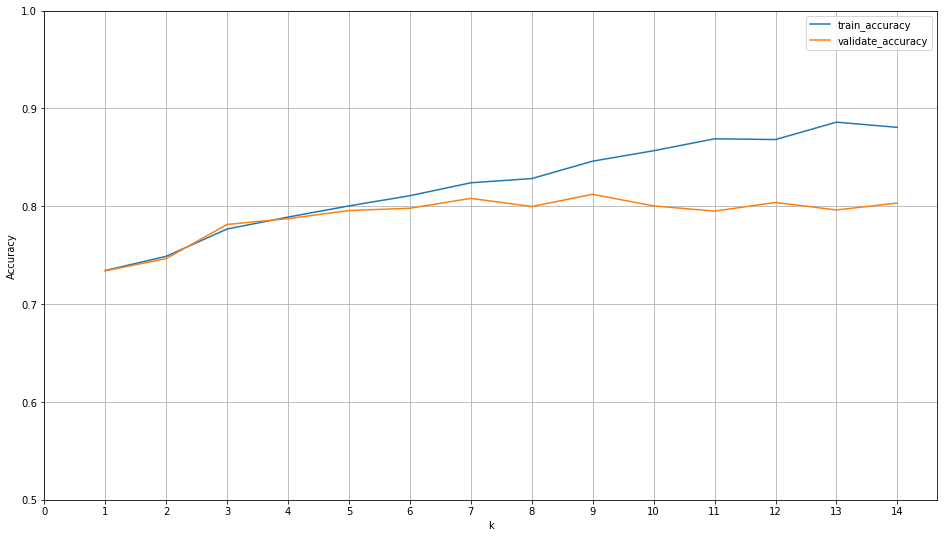

In [162]:
metrics = []

# loop through different values of k
for x in range(1, 15,1):
            
    # define the thing
    rf_1 = RandomForestClassifier(bootstrap = True,
                           class_weight = None,
                           criterion = "gini",
                           min_samples_leaf = 3,
                           n_estimators = 10,
                           max_depth = x,
                           random_state = 174)
    
    # fit the thing (remmeber only fit on training data)
    rf_1.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = rf_1.score(X_train, y_train)
    validate_accuracy = rf_1.score(X_validate, y_validate)
    
    output = {
        "k": x,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)

# plot the data
results.set_index('k').plot(figsize = (16,9))
plt.ylim(0.50, 1)
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,15,1))
plt.grid()